In [16]:
import sys,os
sys.path.append("../")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances  


from sklearn.metrics.cluster import fowlkes_mallows_score

%matplotlib inline

In [2]:
bykau_dir = "../data/bykau_change_object/"
pre_evaluation_dir = "../data/pre_evaluation/"
list_of_articles=pd.read_csv("../conflicted_article.csv")["articles"].tolist()

big_list_of_articles = pd.read_csv("../conflicted_article-big.csv")["articles"].tolist()
aggrement = pd.DataFrame(index=list_of_articles, columns=["clean_notweighted_4", "clean_notweighted_10"])

In [3]:
def read_change_vectors(article_name, change_vector_dir = "../data/change_vector/"):
    change_vec_filename = f"{article_name}.npz"
    change_vector_file = os.path.join(change_vector_dir, change_vec_filename)
    vectors ={}
    with open(change_vector_file, "rb") as file:
        arrays_dict = np.load(file)
        vectors["clean_notweighted_4"] = arrays_dict["4_clean_not_weighted"]
        vectors["clean_notweighted_10"] = arrays_dict["10_clean_not_weighted"] 
    return vectors

In [4]:
# article_name = list_of_articles[2]
# filename =  f"{article_name}_change.h5"
# bykau_cluster_file = os.path.join(bykau_dir, filename)
# with pd.HDFStore(bykau_cluster_file, 'r') as store:
#     bykau_cluster = store.get("data") 
# vectors = read_change_vectors(article_name)

# distances_4 = pairwise_distances(vectors["clean_notweighted_4"])
# distances_10 = pairwise_distances(vectors["clean_notweighted_10"])

In [5]:
# clusters_4 = DBSCAN(eps=1, min_samples=5, metric="precomputed"
#                    ).fit(distances_4).labels_
# clusters_10 = DBSCAN(eps=1, min_samples=5, metric="precomputed"
#                     ).fit(distances_10).labels_
# print(fowlkes_mallows_score(bykau_cluster,clusters_4))
# print(fowlkes_mallows_score(bykau_cluster,clusters_10))

In [92]:
%%time
for article_name in list_of_articles[:1]:
    print(f"processing article name {article_name}")
    filename =  f"{article_name}_change.h5"
    bykau_cluster_file = os.path.join(bykau_dir, filename)
    with pd.HDFStore(bykau_cluster_file, 'r') as store:
        bykau_cluster = store.get("data")  
    vectors = read_change_vectors(article_name)
    
    distances_4 = pairwise_distances(vectors["clean_notweighted_4"])
    distances_10 = pairwise_distances(vectors["clean_notweighted_10"])
    clusters_4 = DBSCAN(eps=1, min_samples=5,
                   ).fit(vectors["clean_notweighted_4"]).labels_
    clusters_10 = DBSCAN(eps=1, min_samples=5,
                    ).fit(vectors["clean_notweighted_10"]).labels_
    
    aggrement.loc[article_name,"clean_notweighted_4"] = fowlkes_mallows_score(bykau_cluster,clusters_4)
    aggrement.loc[article_name,"clean_notweighted_10"] = fowlkes_mallows_score(bykau_cluster,clusters_10)

#     print(fowlkes_mallows_score(bykau_cluster,clusters_10))
#     clusters_4 = DBSCAN(eps=1.5,min_samples=5, ).fit(vectors["clean_notweighted_4"]).labels_
#     clusters_10 = DBSCAN(eps=1.5,min_samples=5, ).fit(vectors["clean_notweighted_10"]).labels_
#     print(adjusted_rand_score(bykau_cluster,clusters_4))
#     print(adjusted_rand_score(bykau_cluster,clusters_10))






processing article name IQ_and_the_Wealth_of_Nations
CPU times: user 13min 31s, sys: 1min 45s, total: 15min 16s
Wall time: 15min


In [ ]:
%%time
for article_name in big_list_of_articles:
    print(f"processing article name {article_name}")
    filename =  f"{article_name}_change.h5"
    bykau_cluster_file = os.path.join(bykau_dir, filename)
    with pd.HDFStore(bykau_cluster_file, 'r') as store:
        bykau_cluster = store.get("data")  
    vectors = read_change_vectors(article_name)
    
    clusters_4 = DBSCAN(eps=1, min_samples=5,
                   ).fit(vectors["clean_notweighted_4"]).labels_
    clusters_10 = DBSCAN(eps=1, min_samples=5,
                    ).fit(vectors["clean_notweighted_10"]).labels_
    
    aggrement.loc[article_name,"clean_notweighted_4"] = fowlkes_mallows_score(bykau_cluster,clusters_4)
    aggrement.loc[article_name,"clean_notweighted_10"] = fowlkes_mallows_score(bykau_cluster,clusters_10)

#     print(fowlkes_mallows_score(bykau_cluster,clusters_10))
#     clusters_4 = DBSCAN(eps=1.5,min_samples=5, ).fit(vectors["clean_notweighted_4"]).labels_
#     clusters_10 = DBSCAN(eps=1.5,min_samples=5, ).fit(vectors["clean_notweighted_10"]).labels_
#     print(adjusted_rand_score(bykau_cluster,clusters_4))
#     print(adjusted_rand_score(bykau_cluster,clusters_10))






processing article name Crusades
processing article name Friedrich_Nietzsche


In [151]:
aggrement

,clean_notweighted_4,clean_notweighted_10
IQ_and_the_Wealth_of_Nations,0.320764,0.368208
Berlin_Wall,0.646299,0.715032
E_(mathematical_constant),0.475244,0.641685
Yugoslavia,0.700324,0.814295
Censorship,0.684681,0.742009
Mama's_Family,0.605944,0.652504
Human_cloning,0.625042,0.641069
Systemic_lupus_erythematosus,0.746702,0.820229
Solar_power,0.671722,0.833627
Gambling,0.689528,0.743668


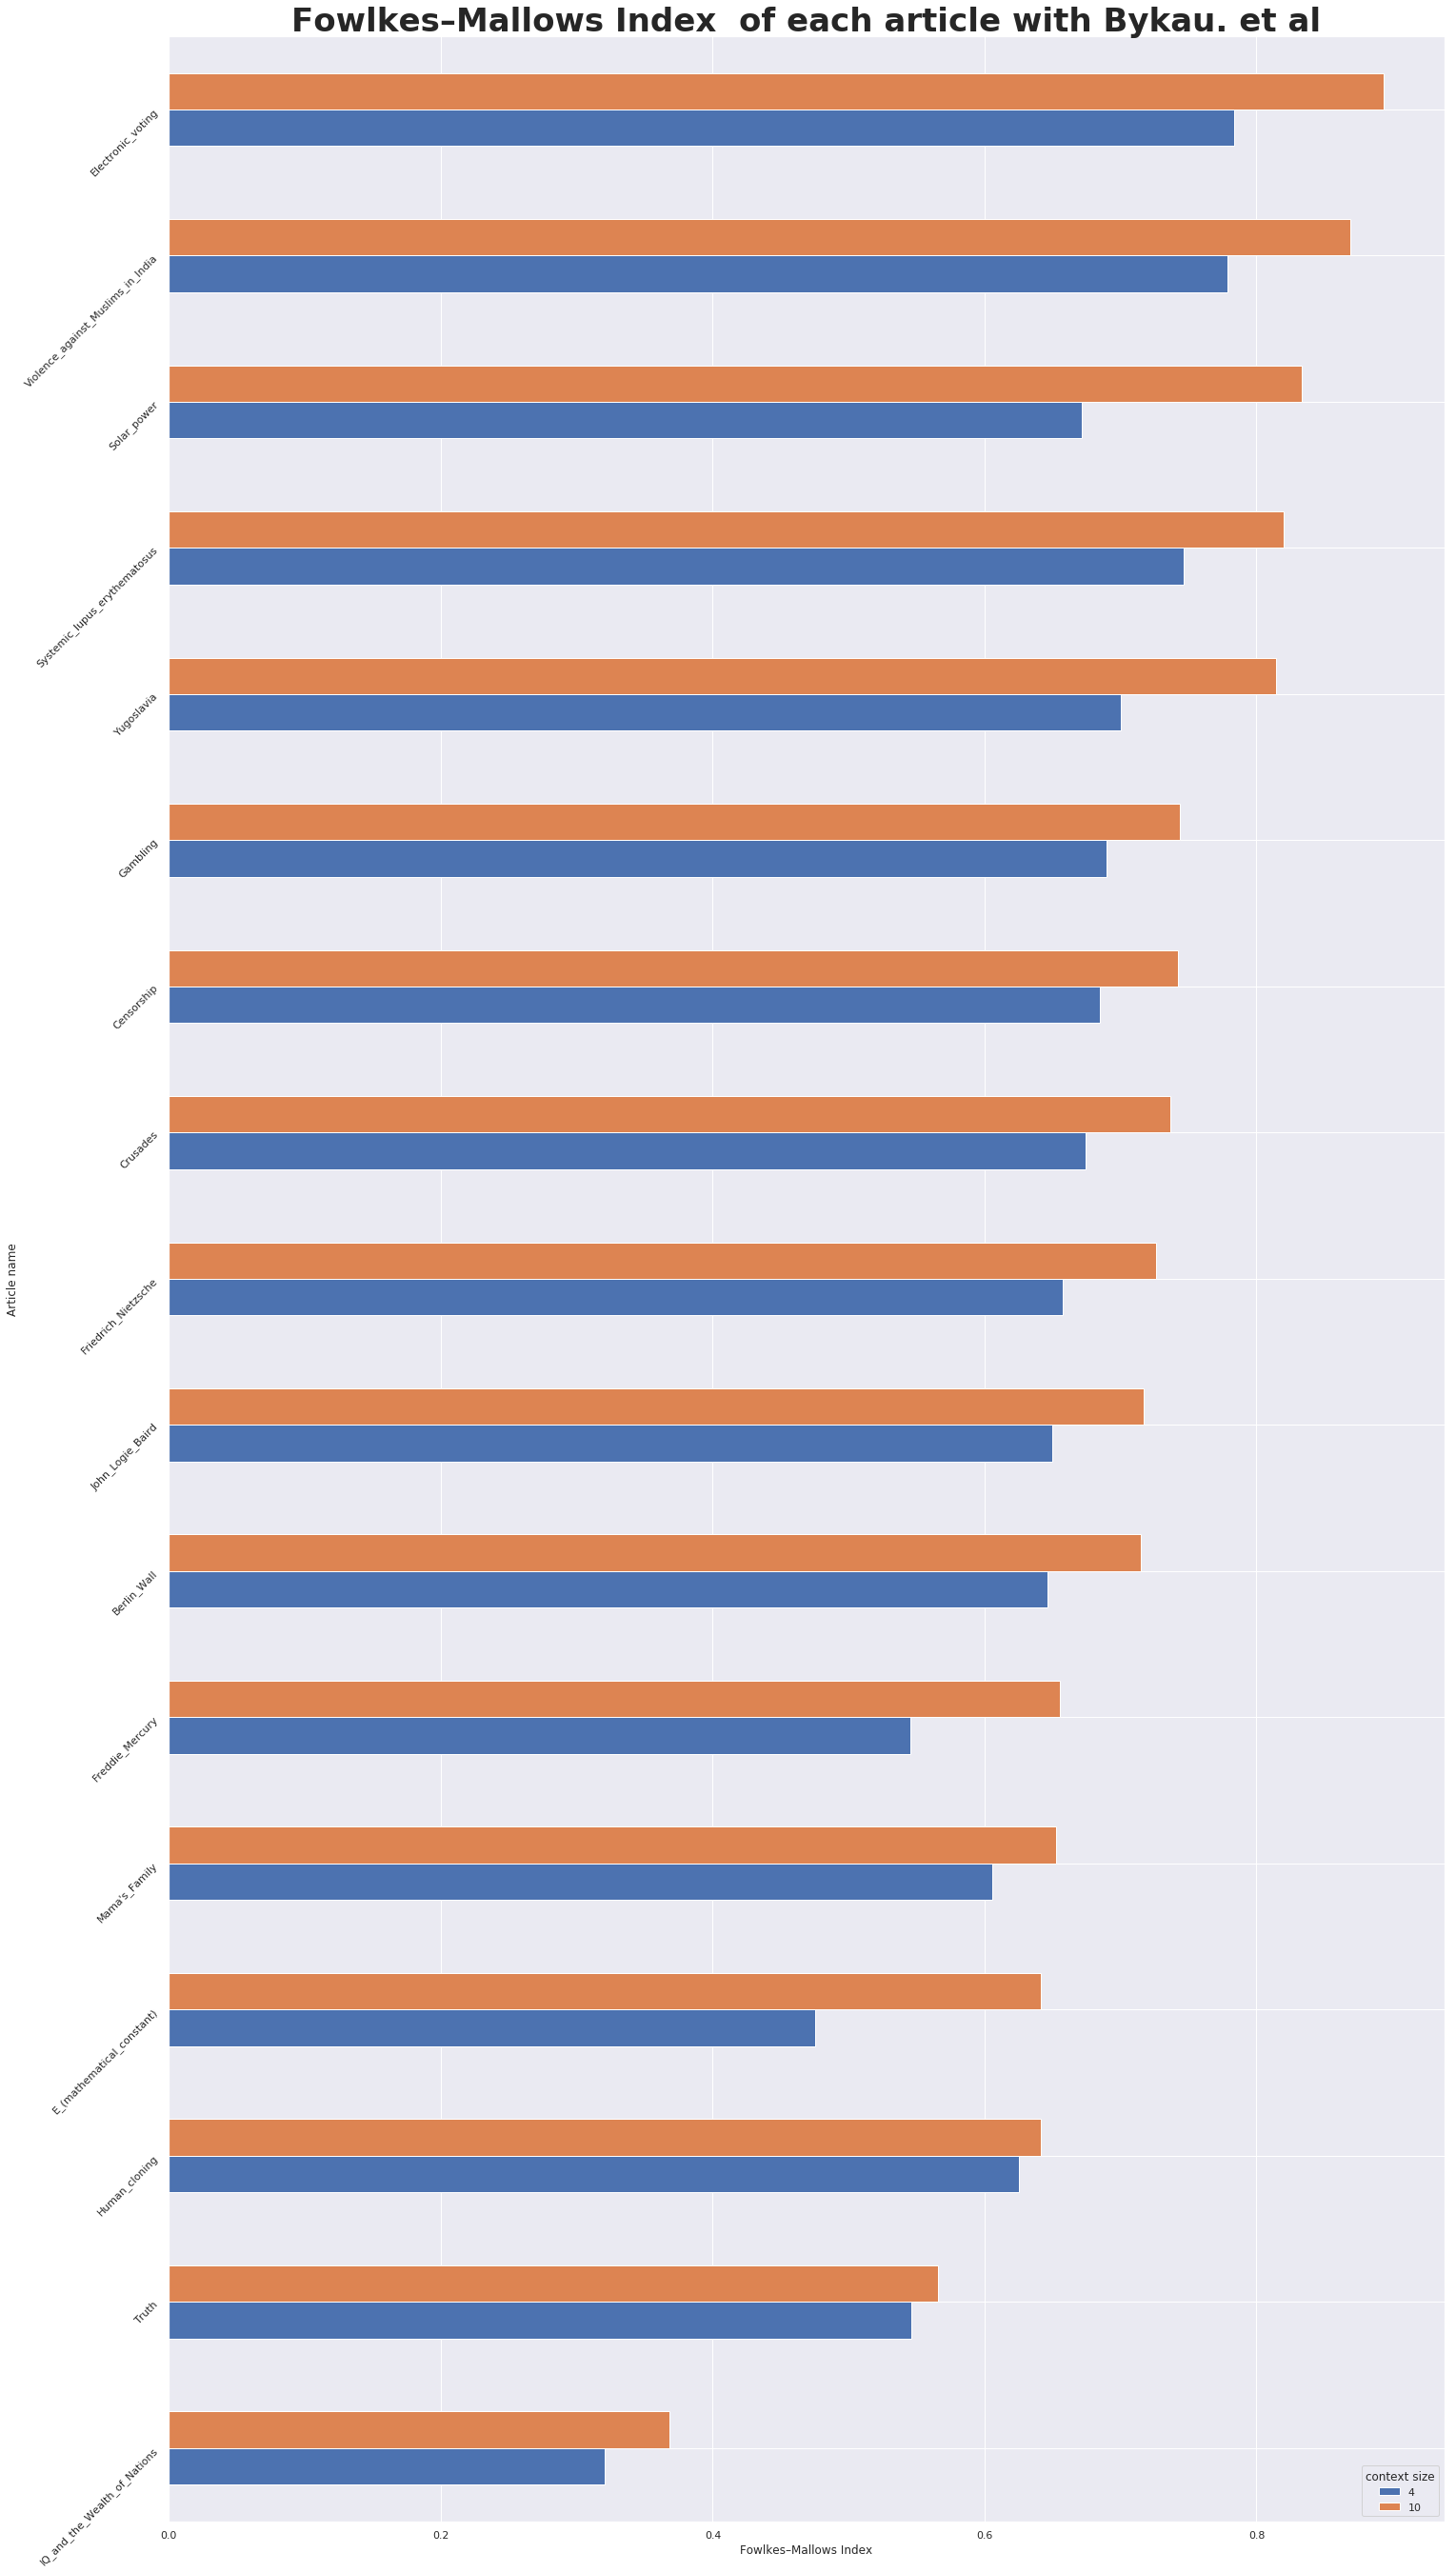

In [153]:
sns.set()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(24,48))
axes.set_ylim([0,1])
aggrement.sort_values(by="clean_notweighted_10").plot.barh(ax=axes,)
axes.legend(["4", "10"], title="context size",)
axes.set_ylabel("Article name")
axes.set_xlabel("Fowlkes–Mallows Index")
axes.set_title("Fowlkes–Mallows Index  of each article with Bykau. et al",
              fontdict ={'fontsize': 34,
 'fontweight' : "bold",
 'verticalalignment': 'baseline',
 'horizontalalignment': "center"})
plt.yticks(rotation=45)
fig.savefig("./visualisation/bar_mallows.png",dpi=600)

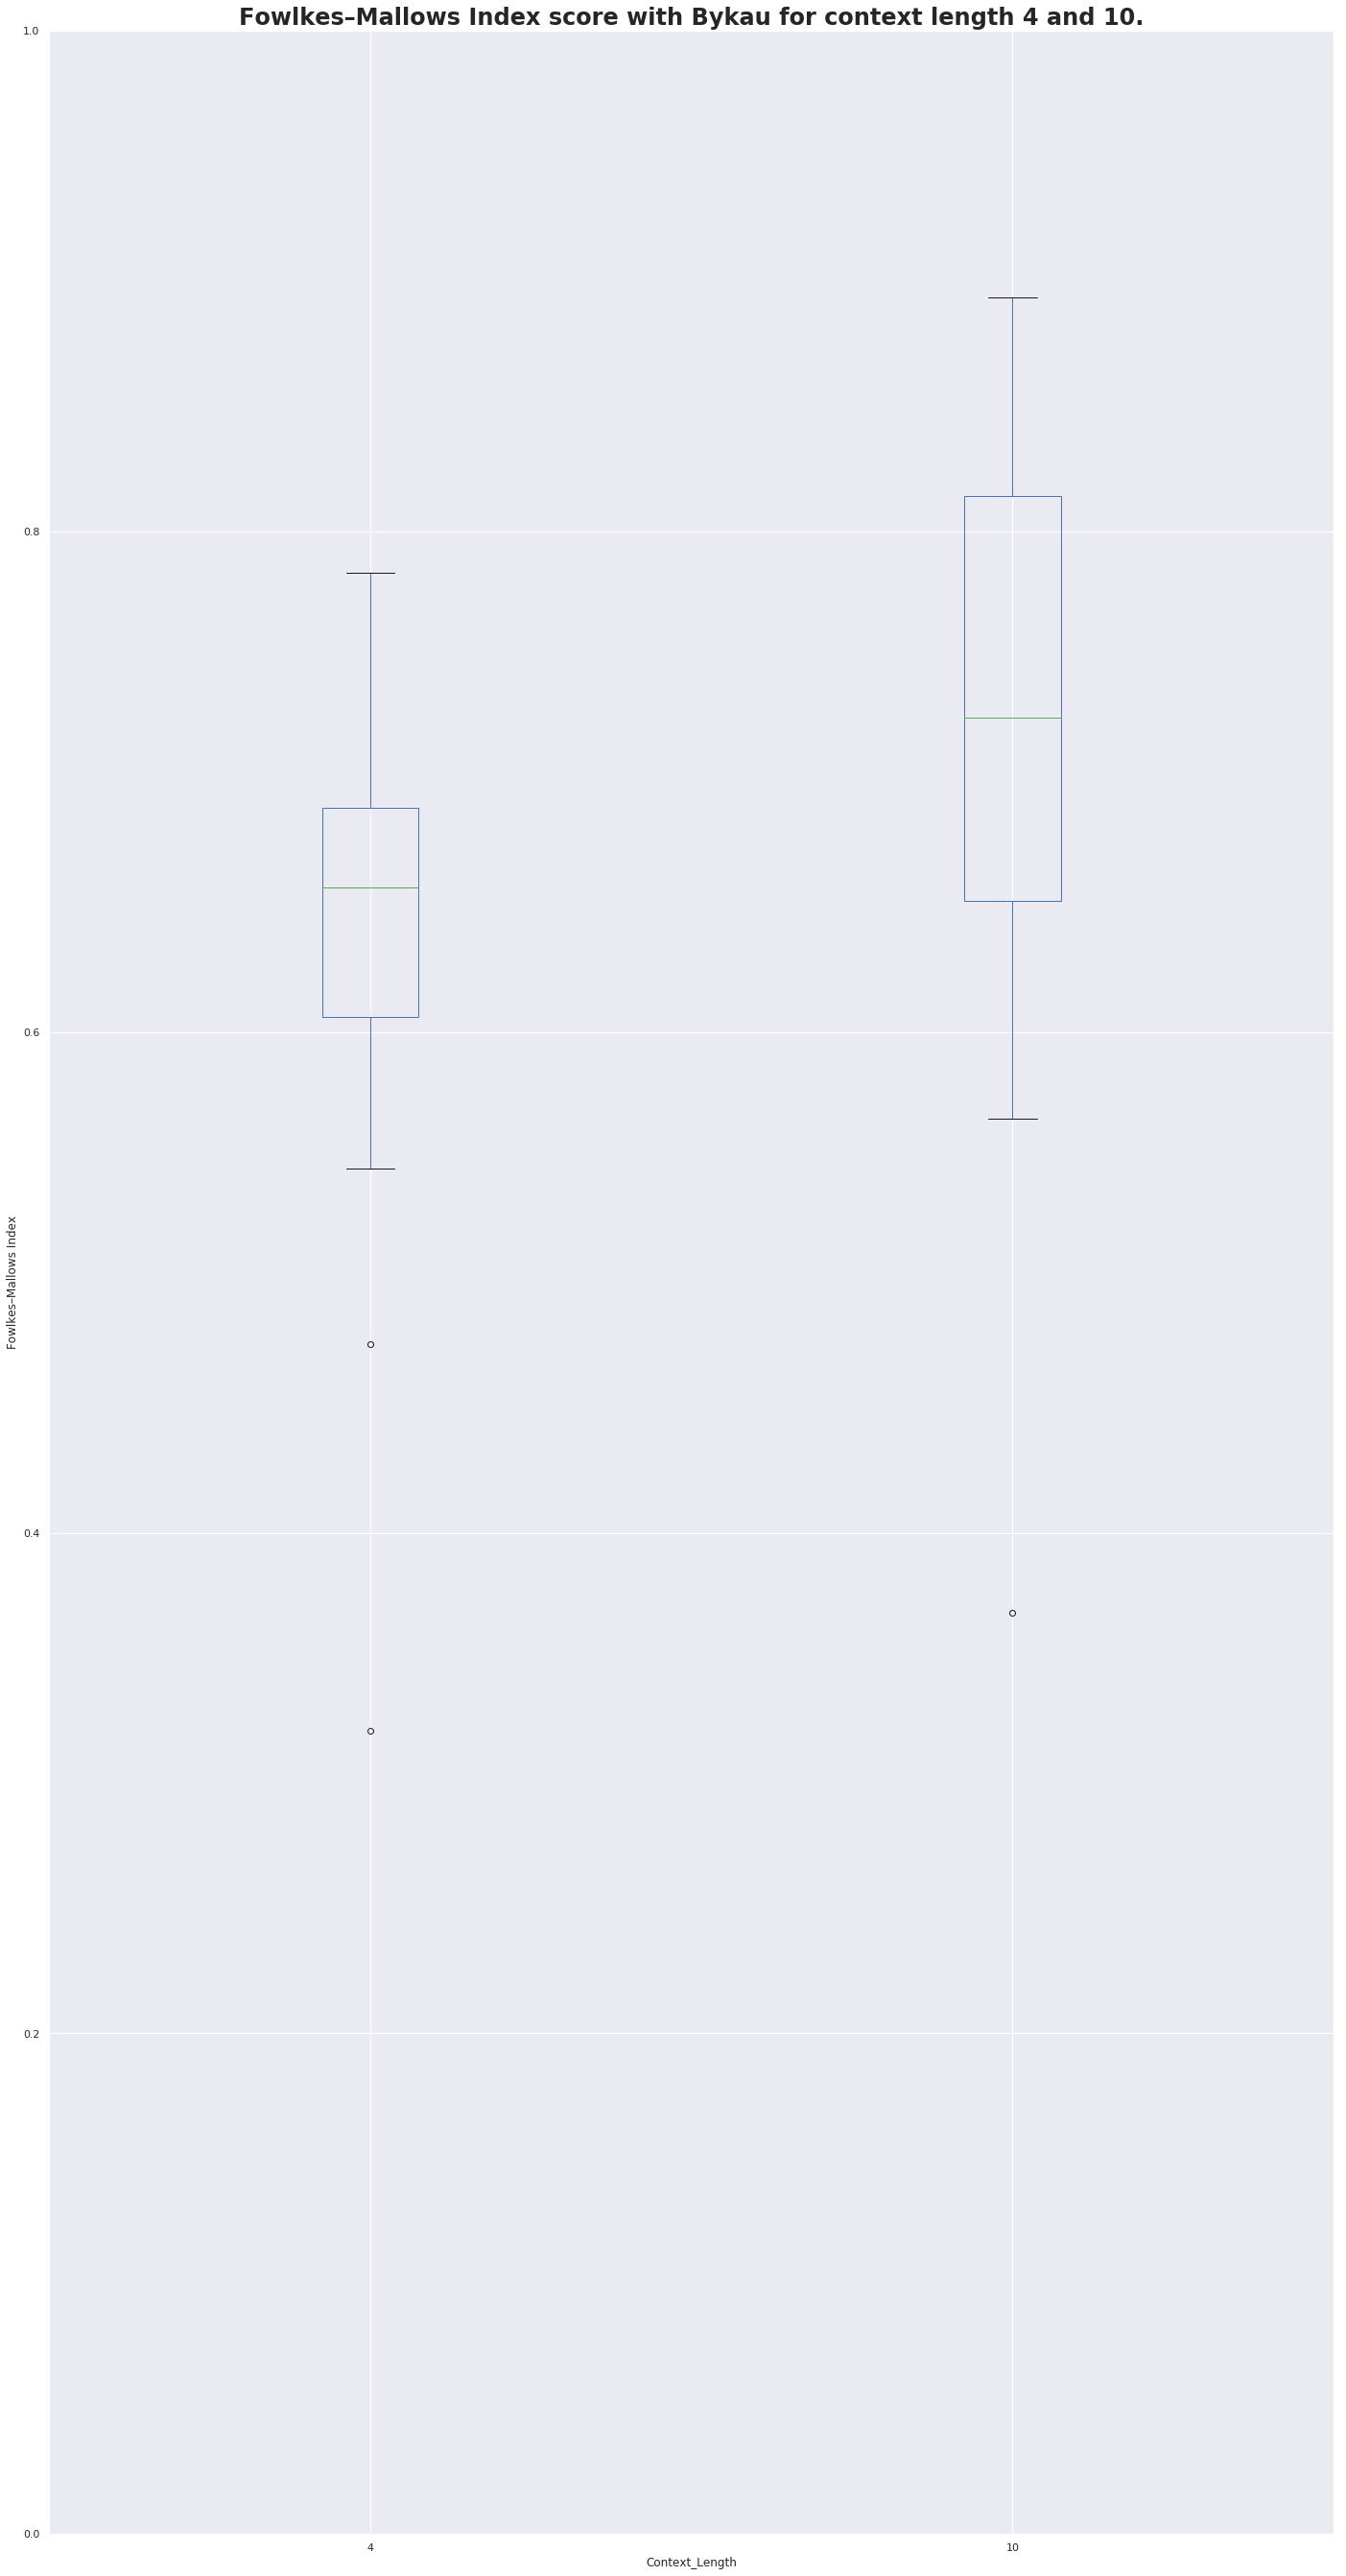

In [155]:
sns.set_context("paper")
sns.set_style("dark")
sns.set()


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(24,48))
axes.set_ylim([0,1])
aggrement.plot.box(ax=axes, widths=0.15)
axes.set_xticklabels([4,10])
axes.set_xlabel("Context_Length")
axes.set_ylabel("Fowlkes–Mallows Index")

axes.set_title("Fowlkes–Mallows Index score with Bykau for context length 4 and 10.",
              fontdict ={'fontsize': 24,
 'fontweight' : "bold",
 'verticalalignment': 'baseline',
 'horizontalalignment': "center"})
fig.savefig("./visualisation/box_mallows.png",dpi=600)